# Computational Physics Club Meeting Notebook 
---
# Title: Projectile Motion Simulation
# Date: 27/02/2025
# Author: Juanda Vasconez
# Club: Computational Physics Club
---

## 1. Meeting Objectives
1
## 📌 1. Comprender los fundamentos del movimiento parabólico  
- Explicar las ecuaciones del movimiento de un proyectil en 2D.  
- Relacionar las variables clave: velocidad inicial (\( v_0 \)), ángulo de lanzamiento (\( \theta \)), gravedad (\( g \)), y tiempo de vuelo (\( t \)).  

## 🚀 2. Implementar simulaciones de trayectorias en Python  
- Utilizar `numpy` para calcular posiciones en función del tiempo.  
- Graficar múltiples trayectorias para distintos ángulos de lanzamiento.  
- Visualizar la parábola de seguridad y el alcance máximo del proyectil.  

## ⚡ 3. Optimizar el código para mejorar eficiencia y legibilidad  
- Reutilizar cálculos comunes en lugar de repetir operaciones innecesarias.  
- Usar técnicas de vectorización en `numpy` para mejorar el rendimiento.  
- Aplicar buenas prácticas en la creación de gráficos con `matplotlib`.  

## 🌍 4. Explorar aplicaciones prácticas del modelo  
- Discutir ejemplos de la vida real donde se aplica el movimiento parabólico (deportes, ingeniería, balística).  
- Extender el código para incorporar factores como resistencia del aire o diferentes valores de gravedad.  


---

## 2. Fundamentos Teóricos

# Movimiento de proyectiles

Un objeto es lanzado con una velocidad inicial $v_0$ = 6 m/s. El vector de velocidad $\vec{v}_0$ forma un ángulo $\theta_0$ = $\pi$/6 con la horizontal.

Objetivo: estimar el alcance horizontal, el tiempo total de vuelo y la altura máxima alcanzada durante el vuelo.


## Discusión del problema
Si asumimos que la resistencia del aire puede ser despreciada y consideramos que el movimiento ocurre con aceleración constante, igual a la aceleración de la gravedad $\vec{g}$, obtenemos las ecuaciones que describen la posición del objeto, considerado como un **objeto puntual**, en función del tiempo. A partir de estas ecuaciones podemos derivar las ecuaciones para:
* el **alcance horizontal**

$$ R = \dfrac{v_0^2}{g}\sin 2\theta_0 $$

* el **tiempo de vuelo**

$$ t_{vuelo} = \dfrac{2 v_0\sin\theta_0}{g} $$

* la **altura máxima**

$$ h = \dfrac{(v_0\sin\theta_0)^2}{g} $$


## Estudio del movimiento: ecuaciones cinemáticas y trayectoria

Las ecuaciones cinemáticas dan el valor de cada una de las coordenadas del cuerpo puntual en función del tiempo. En este caso:

$$ x(t) = v_{0x} t $$

$$ y(t) = v_{0y} t - \dfrac{1}{2}gt^2 $$

donde $v_{0x}$ y $v_{0y}$ son las componentes del vector de velocidad $\vec{v}_0$ en el tiempo $t = 0$ con respecto a los ejes cartesianos $x$ y $y$.

$$ v_{0x} = v_0 \cos\theta_0 $$

$$ v_{0y} = v_0 \sin\theta_0 $$

* Podemos usar las ecuaciones $x(t)$ y $y(t)$ como ecuaciones paramétricas para la **trayectoria**.
* De hecho, podemos considerar un **array** de valores de $t$ en el rango entre el instante inicial $t=0$ y un instante final que, por conveniencia, elegimos que coincida con $t_B$, el *tiempo de vuelo*.
* Para generar el array de valores distribuidos linealmente entre $0$ y $t_B$ usamos la función **linspace()** del módulo **numpy**.
* Calculamos las coordenadas $x$ y $y$ correspondientes a cada uno de los valores de $t$ pertenecientes al array.
* Graficamos los puntos correspondientes a los pares de coordenadas $x, y$ para cada valor de $t$ para obtener el gráfico de la trayectoria.
* Es importante que el eje $x$ y el eje $y$ tengan la misma unidad de medida y la misma escala.


## Dependencia del ángulo de lanzamiento $\theta_0$

Consideremos la trayectoria obtenida en correspondencia a diferentes valores del ángulo de lanzamiento $\theta_0$, manteniendo constante la magnitud de la velocidad inicial $v_0$.

* Producimos un array de valores de $\theta_0$ usando la función **arange()** del módulo **numpy**
* Graficamos las trayectorias correspondientes a todos los valores de $\theta_0$
---

## 3. Code Implementation
---

In [2]:
# Instalación de paquetes necesarios
%pip install matplotlib
%pip install scipy


import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as ctn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Definimos el ángulo de lanzamiento en radianes
theta = np.pi / 4

#Definimos la velocidad inicial en m/s
v0 = 6

# Definimos la aceleración debida a la gravedad en m/s^2
g = ctn.g

# Calculamos el alcance horizontal (R) usando la fórmula del rango de un proyectil
R = (v0**2 * np.sin(2*theta)) / g

# Calculamos el tiempo de vuelo total (tB) usando la fórmula del tiempo de vuelo de un proyectil
tB = (2 * v0 * np.sin(theta)) / g

# Calculamos la altura máxima (h) usando la fórmula de la altura máxima de un proyectil
h = (v0**2 * np.sin(theta)**2) / (2 * g)

# Imprimimos los resultados calculados
print('\n Horizontal range is = {0:0.3f} (m)\n'.format(R))
print('\n Time of flight is = {0:0.3f} (s)\n'.format(tB))
print('\n Maximum height is = {0:0.3f} (m)\n'.format(h))


 Horizontal range is = 3.671 (m)


 Time of flight is = 0.865 (s)


 Maximum height is = 0.918 (m)



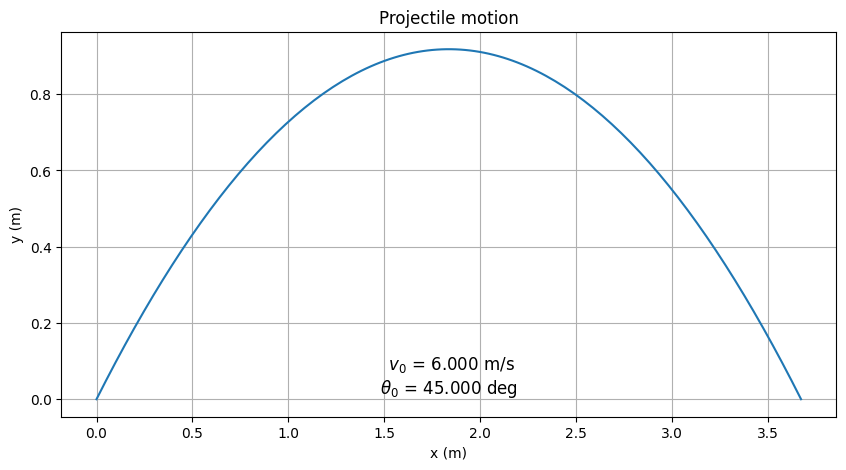

In [4]:
# Generamos un array de valores de tiempo desde 0 hasta tB con 150 puntos
t = np.linspace(0, tB, 150)

# Calculamos las coordenadas x e y para cada valor de tiempo t
x = v0 * t * np.cos(theta)
y = v0 * t * np.sin(theta) - 0.5 * g * t**2

# Creamos una cadena de texto con la información de las condiciones iniciales
ics = r" $v_0$ = {0:0.3f} m/s".format(v0) + '\n' + r"$\theta_0$ = {0:0.3f} deg".format(theta * 180 / np.pi)

# Configuramos el tamaño de la figura para la gráfica
plt.figure(figsize=(10, 5))

# Graficamos la trayectoria del movimiento proyectil
plt.plot(x, y)

# Etiquetas de los ejes
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Título de la gráfica
plt.title('Projectile motion')

# Añadimos el texto con las condiciones iniciales en la gráfica
plt.text(R / 2, 0, ics, fontsize=12, horizontalalignment='center', verticalalignment='bottom')

# Mostramos la cuadrícula en la gráfica
plt.grid()

# Mostramos la gráfica
plt.show()

## 4. Simulation and Visualization

---

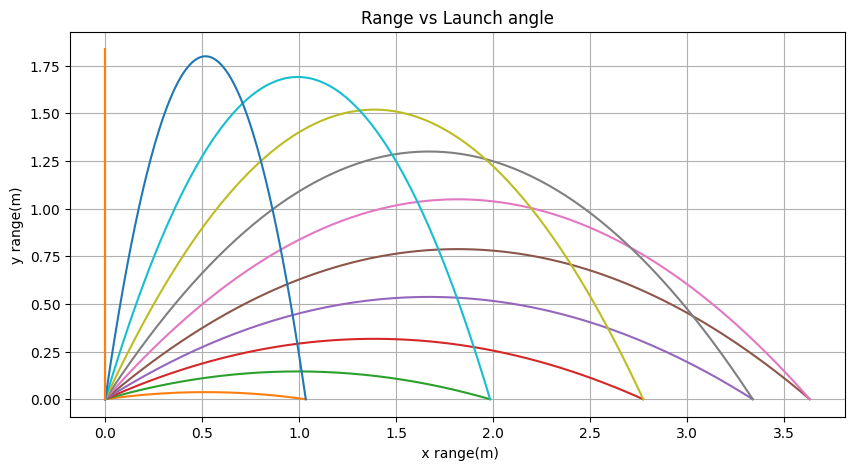

In [5]:
# Definimos un array de ángulos de lanzamiento theta0 que varía de 0 a pi/2 en 12 pasos
theta0 = np.linspace(0, np.pi/2, 12)

# Creamos una figura para la gráfica
fig = plt.figure(3, figsize=(10, 5))
plt.xlabel(' x range(m)')  # Etiqueta del eje x
plt.ylabel('y range(m)')  # Etiqueta del eje y
plt.title('Range vs Launch angle')  # Título de la gráfica

# Iteramos sobre cada ángulo en theta0
for angle in theta0:
    # Calculamos el tiempo de vuelo tB para el ángulo actual
    tB  = (2*v0*np.sin(angle))/g
    # Generamos un array de tiempos t desde 0 hasta tB con 150 puntos
    t = np.linspace(0, tB, 150)
    # Calculamos las coordenadas x e y para cada tiempo t
    x = v0 * t * np.cos(angle)
    y = v0 * t * np.sin(angle) - 0.5 * g * t**2
    # Graficamos la trayectoria para el ángulo actual
    plt.plot(x, y)
    plt.draw()  # Actualizamos la gráfica

# Mostramos la cuadrícula en la gráfica
plt.grid()
# Mostramos la gráfica
plt.show()

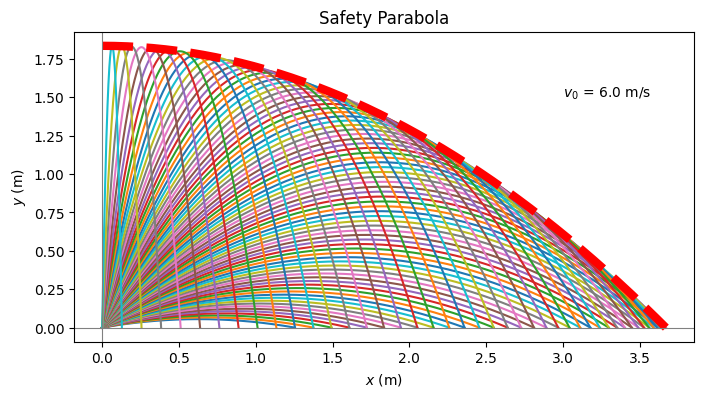

In [6]:
# Definición de variables
theta0deg = np.arange(10, 90, 1)  # Array de ángulos de lanzamiento en grados, de 10 a 89 grados
theta0 = np.radians(theta0deg)  # Conversión de ángulos a radianes

# Crear una figura y un eje para la gráfica
fig, ax = plt.subplots(figsize=(8, 6))

# Configuración de etiquetas y texto en el gráfico
ax.set_xlabel('$x$ (m)')  # Etiqueta del eje x
ax.set_ylabel('$y$ (m)')  # Etiqueta del eje y
ax.text(3.0, 1.50, rf'$v_0$ = {v0:0.1f} m/s')  # Texto en el gráfico con la velocidad inicial

# Generación de trayectorias
# Crear un array de valores de tiempo para cada ángulo de lanzamiento
t_values = [np.linspace(0, 2 * v0 * np.sin(angle) / g, 128) for angle in theta0]

# Iterar sobre cada ángulo y su correspondiente array de tiempos
for angle, t in zip(theta0, t_values):
    x = v0 * np.cos(angle) * t  # Calcular la coordenada x
    y = v0 * np.sin(angle) * t - 0.5 * g * t**2  # Calcular la coordenada y
    ax.plot(x, y)  # Graficar la trayectoria

# Parábola de seguridad
Rmax = (v0**2) / g  # Cálculo del alcance máximo
xx = np.linspace(0, Rmax, 180)  # Array de valores de x para la parábola de seguridad
yy = (v0**2) / (2 * g) - 0.5 * g * xx**2 / (v0**2)  # Cálculo de la parábola de seguridad
ax.plot(xx, yy, linewidth=6, linestyle='--', color='red')  # Graficar la parábola de seguridad

# Líneas de referencia y formato
ax.axhline(color='gray', linewidth=0.8)  # Línea horizontal en y=0
ax.axvline(color='gray', linewidth=0.8)  # Línea vertical en x=0
ax.set_aspect('equal', adjustable='box')  # Ajustar la escala de los ejes
ax.set_title('Safety Parabola')  # Título del gráfico

# Mostrar el gráfico
plt.show()


## 5. Analysis and Discussion

## Lo que hemos aprendido
*Física*
* Parámetros que caracterizan el movimiento de un proyectil
* Determinación de la trayectoria
* Dependencia del ángulo de lanzamiento

*Python*
* Generar un array de valores distribuidos homogéneamente sobre un cierto rango
* Construir una gráfica con las mismas escalas para los dos ejes
* Iterar con el bucle **for**

---

## 6. Referencias
#### Python
2. Documentación de Matplotlib 3.3.1 sobre [pyplot.figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) con una gran cantidad de ejemplos disponibles.
3. [matplotlib.text](https://matplotlib.org/stable/api/text_api.html) para incluir texto en una figura.
4. [matplotlib.pyplot.xlim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) Obtener o establecer los límites x de los ejes actuales.
5. [Documentación de Pyplot](https://matplotlib.org/stable/)
6. [Tutoriales de matplotlib](https://matplotlib.org/stable/tutorials/index.html)

---
